# 0. Import and Parameters

In [ ]:
# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# others
from datetime import datetime, timedelta

In [ ]:
# Parameters setting
# Features 

# Time period
# will be used in 3-2
time_start = '2013-01-01T00:00:00'
time_end = '2022-12-31T00:00:00'

# 1. Import data and Select time period

## (1) Import data

In [ ]:
sentiment_df = pd.read_csv('research_main\data\processed_sentiment_variable.csv')
tech_df = pd.read_csv('research_main\data\processed_technical_indicator.csv')

In [ ]:
sentiment_df

,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment,datetime
0,-0.947225,-7.077602,-16.404664,2011-09-30
1,0.519091,0.000000,0.000000,2011-10-05
2,-0.911413,-5.141673,-17.316077,2011-10-07
3,-0.963791,-0.963791,0.000000,2011-11-03
4,-0.946353,-1.910143,0.000000,2011-11-04
...,...,...,...,...
657,-1.912174,-9.327062,-11.796896,2023-01-24
658,-2.847341,-12.174403,-13.810890,2023-01-25
659,-2.560856,-15.458993,-15.411840,2023-01-26
660,-0.023535,-12.655522,-15.435375,2023-01-27


In [ ]:
tech_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Today_trend,Today_trend_cate,Tomorrow_trend,Tomorrow_trend_cate,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,datetime
0,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0,0.005429,1,0.002172,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-13
1,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0,0.002172,1,0.001086,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-14
2,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0,0.001086,1,-0.001629,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-17
3,0.064067,0.064610,0.061894,0.062437,67766400,0.0,0.0,-0.001629,0,-0.001086,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-18
4,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0,-0.001086,0,-0.001629,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297,248.000000,255.179993,245.470001,252.750000,31259900,0.0,0.0,4.750000,1,11.850006,1,242.193571,52.521303,90.081663,251.102479,238.412094,12.690385,2023-02-01
9298,258.820007,264.690002,257.250000,264.600006,39940400,0.0,0.0,5.779999,1,-6.250000,0,244.057143,53.432789,99.735383,251.262213,238.483940,12.778273,2023-02-02
9299,259.540009,264.200012,257.100006,258.350006,29062300,0.0,0.0,-1.190002,0,-1.580017,0,245.422858,53.432789,81.358440,251.346092,238.538442,12.807650,2023-02-03
9300,257.440002,258.299988,254.779999,256.769989,22518000,0.0,0.0,-0.670013,0,10.790009,1,246.595714,53.432789,76.712699,251.410280,238.588460,12.821820,2023-02-06


## (2) Merge 2 kinds of data to one dataframe

In [ ]:
df_merge = pd.merge(tech_df, sentiment_df, on='datetime', how='left')

In [ ]:
df_merge

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Today_trend,Today_trend_cate,Tomorrow_trend,...,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,datetime,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment
0,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0,0.005429,1,0.002172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-13,NaN,NaN,NaN
1,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0,0.002172,1,0.001086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-14,NaN,NaN,NaN
2,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0,0.001086,1,-0.001629,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-17,NaN,NaN,NaN
3,0.064067,0.064610,0.061894,0.062437,67766400,0.0,0.0,-0.001629,0,-0.001086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-18,NaN,NaN,NaN
4,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0,-0.001086,0,-0.001629,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297,248.000000,255.179993,245.470001,252.750000,31259900,0.0,0.0,4.750000,1,11.850006,...,242.193571,52.521303,90.081663,251.102479,238.412094,12.690385,2023-02-01,NaN,NaN,NaN
9298,258.820007,264.690002,257.250000,264.600006,39940400,0.0,0.0,5.779999,1,-6.250000,...,244.057143,53.432789,99.735383,251.262213,238.483940,12.778273,2023-02-02,NaN,NaN,NaN
9299,259.540009,264.200012,257.100006,258.350006,29062300,0.0,0.0,-1.190002,0,-1.580017,...,245.422858,53.432789,81.358440,251.346092,238.538442,12.807650,2023-02-03,NaN,NaN,NaN
9300,257.440002,258.299988,254.779999,256.769989,22518000,0.0,0.0,-0.670013,0,10.790009,...,246.595714,53.432789,76.712699,251.410280,238.588460,12.821820,2023-02-06,NaN,NaN,NaN


# 2. Feature Engineering

Still doing this part, must check out before training

## (1) Drop useless columns

In [ ]:
# df_merge.drop(columns=['Today_trend_cate', 'Tomorrow_trend_cate', 'datetime', 'title_sentiment_score', 'Ema_12', 'Sma'], inplace=True)

In [ ]:
df_merge

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Today_trend,Today_trend_cate,Tomorrow_trend,...,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,datetime,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment
0,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0,0.005429,1,0.002172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-13,NaN,NaN,NaN
1,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0,0.002172,1,0.001086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-14,NaN,NaN,NaN
2,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0,0.001086,1,-0.001629,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-17,NaN,NaN,NaN
3,0.064067,0.064610,0.061894,0.062437,67766400,0.0,0.0,-0.001629,0,-0.001086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-18,NaN,NaN,NaN
4,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0,-0.001086,0,-0.001629,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297,248.000000,255.179993,245.470001,252.750000,31259900,0.0,0.0,4.750000,1,11.850006,...,242.193571,52.521303,90.081663,251.102479,238.412094,12.690385,2023-02-01,NaN,NaN,NaN
9298,258.820007,264.690002,257.250000,264.600006,39940400,0.0,0.0,5.779999,1,-6.250000,...,244.057143,53.432789,99.735383,251.262213,238.483940,12.778273,2023-02-02,NaN,NaN,NaN
9299,259.540009,264.200012,257.100006,258.350006,29062300,0.0,0.0,-1.190002,0,-1.580017,...,245.422858,53.432789,81.358440,251.346092,238.538442,12.807650,2023-02-03,NaN,NaN,NaN
9300,257.440002,258.299988,254.779999,256.769989,22518000,0.0,0.0,-0.670013,0,10.790009,...,246.595714,53.432789,76.712699,251.410280,238.588460,12.821820,2023-02-06,NaN,NaN,NaN


## (2) Correlation Matrix

                              Open      High       Low     Close    Volume  \
Open                      1.000000  0.999938  0.999929  0.999850 -0.320007   
High                      0.999938  1.000000  0.999905  0.999924 -0.318833   
Low                       0.999929  0.999905  1.000000  0.999929 -0.321366   
Close                     0.999850  0.999924  0.999929  1.000000 -0.320184   
Volume                   -0.320007 -0.318833 -0.321366 -0.320184  1.000000   
Dividends                 0.057309  0.057045  0.057394  0.057083 -0.022158   
Stock Splits             -0.015207 -0.015165 -0.015232 -0.015135  0.013571   
Today_trend               0.008398  0.016270  0.017079  0.025740 -0.015626   
Today_trend_cate          0.005235  0.008207  0.008718  0.011868 -0.020962   
Tomorrow_trend            0.017232  0.016918  0.016734  0.015344 -0.008511   
Tomorrow_trend_cate      -0.002735 -0.002846 -0.002867 -0.003212 -0.000207   
Sma                       0.999373  0.999422  0.999245  0.999259

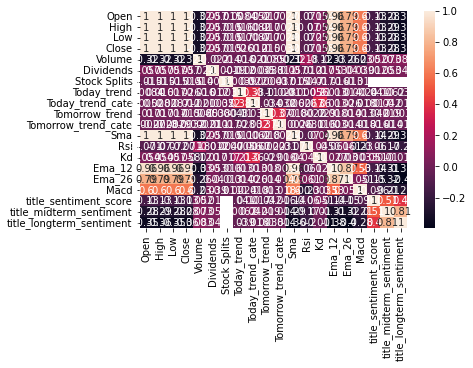

In [ ]:
corr = df_merge.corr()
print(corr)

sn.heatmap(corr, annot=True)
plt.show()

## (3) Drop useless columns

In [ ]:
df_merge.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Today_trend', 'Today_trend_cate', 'Tomorrow_trend',
       'Tomorrow_trend_cate', 'Sma', 'Rsi', 'Kd', 'Ema_12', 'Ema_26', 'Macd',
       'datetime', 'title_sentiment_score', 'title_midterm_sentiment',
       'title_longterm_sentiment'],
      dtype='object')

In [ ]:
# df_merge.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Ema_12', 'Ema_26', 'Today_trend_cate', 'Tomorrow_trend'], inplace=True)
feature = [
    'Today_trend',
    'Tomorrow_trend_cate', 
    'Sma', 
    'Rsi', 
    'Kd', 
    'Ema_12', 
    'Ema_26', 
    'Macd',
    'datetime', 
    'title_sentiment_score', 
    'title_midterm_sentiment',
    'title_longterm_sentiment'
]

df_merge = df_merge[feature]

In [ ]:
df_merge

,Today_trend,Tomorrow_trend_cate,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,datetime,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment
0,0.005429,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-13,NaN,NaN,NaN
1,0.002172,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-14,NaN,NaN,NaN
2,0.001086,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-17,NaN,NaN,NaN
3,-0.001629,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-18,NaN,NaN,NaN
4,-0.001086,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986-03-19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9297,4.750000,1,242.193571,52.521303,90.081663,251.102479,238.412094,12.690385,2023-02-01,NaN,NaN,NaN
9298,5.779999,0,244.057143,53.432789,99.735383,251.262213,238.483940,12.778273,2023-02-02,NaN,NaN,NaN
9299,-1.190002,0,245.422858,53.432789,81.358440,251.346092,238.538442,12.807650,2023-02-03,NaN,NaN,NaN
9300,-0.670013,1,246.595714,53.432789,76.712699,251.410280,238.588460,12.821820,2023-02-06,NaN,NaN,NaN


# 3. Final Adjustment before training

## (1) Data Cleaning

In [ ]:
# Check NaN
df_merge.isnull().sum()

Today_trend                    0
Tomorrow_trend_cate            0
Sma                            0
Rsi                            0
Kd                             0
Ema_12                         0
Ema_26                         0
Macd                           0
datetime                       0
title_sentiment_score       8656
title_midterm_sentiment     8656
title_longterm_sentiment    8656
dtype: int64

In [ ]:
# clean up NaN
df_merge.fillna(0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
# Check NaN
df_merge.isnull().sum()

Today_trend                 0
Tomorrow_trend_cate         0
Sma                         0
Rsi                         0
Kd                          0
Ema_12                      0
Ema_26                      0
Macd                        0
datetime                    0
title_sentiment_score       0
title_midterm_sentiment     0
title_longterm_sentiment    0
dtype: int64

## (2) Select the target time period

In [ ]:
# We use index to filter for time periods
df_selected_time = df_merge[(df_merge['datetime']> time_start) & (df_merge['datetime'] < time_end)]
df_selected_time

,Today_trend,Tomorrow_trend_cate,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,datetime,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment
6759,0.305092,0,22.382424,51.256932,91.911742,23.513533,22.160512,1.353021,2013-01-02,0.000000,0.000000,0.000000
6760,-0.313337,0,22.383013,51.256932,64.706370,23.501178,22.161360,1.339818,2013-01-03,0.000000,0.000000,0.000000
6761,-0.437024,0,22.361220,51.256932,27.206011,23.483993,22.161052,1.322942,2013-01-04,0.000000,0.000000,0.000000
6762,-0.065966,0,22.354152,51.256932,23.529145,23.466524,22.160631,1.305893,2013-01-07,0.000000,0.000000,0.000000
6763,-0.164915,1,22.321758,51.256932,13.235519,23.447895,22.159895,1.288000,2013-01-08,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9272,2.619995,0,246.161427,53.018343,16.173037,255.491685,238.432780,17.058905,2022-12-23,0.914653,1.641511,-0.857045
9273,-1.739990,0,245.578571,53.018343,10.282894,255.272375,238.428740,16.843635,2022-12-27,0.000000,0.000000,0.000000
9274,-2.360001,1,244.875714,53.018343,2.196350,255.026903,238.418043,16.608860,2022-12-28,0.000000,0.000000,0.000000
9275,5.360001,0,244.419285,53.018343,23.760383,254.861023,238.425154,16.435868,2022-12-29,0.000000,0.000000,0.000000


In [ ]:
# Drop datetime after using it
df_selected_time.drop(columns=['datetime'], inplace=True)
df_selected_time

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Today_trend,Tomorrow_trend_cate,Sma,Rsi,Kd,Ema_12,Ema_26,Macd,title_sentiment_score,title_midterm_sentiment,title_longterm_sentiment
6759,0.305092,0,22.382424,51.256932,91.911742,23.513533,22.160512,1.353021,0.000000,0.000000,0.000000
6760,-0.313337,0,22.383013,51.256932,64.706370,23.501178,22.161360,1.339818,0.000000,0.000000,0.000000
6761,-0.437024,0,22.361220,51.256932,27.206011,23.483993,22.161052,1.322942,0.000000,0.000000,0.000000
6762,-0.065966,0,22.354152,51.256932,23.529145,23.466524,22.160631,1.305893,0.000000,0.000000,0.000000
6763,-0.164915,1,22.321758,51.256932,13.235519,23.447895,22.159895,1.288000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
9272,2.619995,0,246.161427,53.018343,16.173037,255.491685,238.432780,17.058905,0.914653,1.641511,-0.857045
9273,-1.739990,0,245.578571,53.018343,10.282894,255.272375,238.428740,16.843635,0.000000,0.000000,0.000000
9274,-2.360001,1,244.875714,53.018343,2.196350,255.026903,238.418043,16.608860,0.000000,0.000000,0.000000
9275,5.360001,0,244.419285,53.018343,23.760383,254.861023,238.425154,16.435868,0.000000,0.000000,0.000000


## (3) Train_test_split

In [ ]:
# 1. Set up X, y
X = df_selected_time.drop(columns=['Tomorrow_trend_cate'])
y = df_selected_time['Tomorrow_trend_cate']

In [ ]:
# Check X, y shape
print('X:', X.shape)
print('y:', y.shape)

X: (2518, 10)
y: (2518,)


In [ ]:
# 2. train_test_split
# val dataset for final examination

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Check 
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (2039, 10)
X_test: (252, 10)
y_train: (2039,)
y_test: (252,)
